# DM and Dedispersion

In [2]:
from dedispersionTools import *

%matplotlib notebook

## Introduction ##

Pulses that travel through the ISM are subject to a number of effects, all of which can change the estimated times-of-arrival (TOAs) and affect any other signal we are trying to detect. The most prominent effect on timing comes from pulses traveling through the cold, ionized plasma of the ISM. The index of refraction of the medium is frequency-dependent, resulting in lower frequencies arriving later at the telescope than higher frequencies. The amount of time that a signal will be shifted by is given by
$$
t_{\mathrm{DM}}=4.15\,\mathrm{ms}\Bigl(\frac{\nu}{\mathrm{GHz}}\Bigr)^{-2}\biggr(\frac{\mathrm{DM}}{\mathrm{pc}\,\mathrm{cm^{-3}}}\biggl),
$$
where DM is the dispersion measure, the integral of the electron number density, $n_e$, along the line of sight to the pulsar (a distance $D$ away):
$$
\mathrm{DM}=\int_0^D n_e\,d\ell.
$$
Because every frequency is shifted by an amount proportional to the DM, one can determine the DM by measuring the relative delay between two different frequencies $\nu_1$ and $\nu_2$, which is given by
$$
\Delta t_{\mathrm{DM}}=4.15\,\mathrm{ms}\biggl[\Bigl(\frac{\nu_1}{\mathrm{GHz}}\Bigr)^{-2}-\Bigl(\frac{\nu_2}{\mathrm{GHz}}\Bigr)^{-2}\biggr]\biggr(\frac{\mathrm{DM}}{\mathrm{pc}\,\mathrm{cm^{-3}}}\biggl).
$$
Therefore, by measuring the TOAs at two different frequencies, we can estimate the dispersion measure, remove the effect, and improve the overall timing of the pulsar.

In this activity, you will be experimenting with applying dedispersion to real pulsar observations taken by the Green Bank radio telescope.

## Loading the data

The function `initializer(dataSet)` accesses a data set for you to analyze and returns the intensity values, the time values of the 2048 bins across pulse phase (in ms), and the frequencies at which they are recorded (in GHz). `dataSet` should be one of `'Set1'`, `'Set2'`, ... `'Set5'`. You can visualize any single frequency profile using `plt.plot(data[freqChannel])`, where `freqChannel` is an integer between 0 and one less than the number of frequency channels (`len(data)` or`data.shape[0]`).

In [4]:
data, bins, freqs = initializer('Set1')

<IPython.core.display.Javascript object>


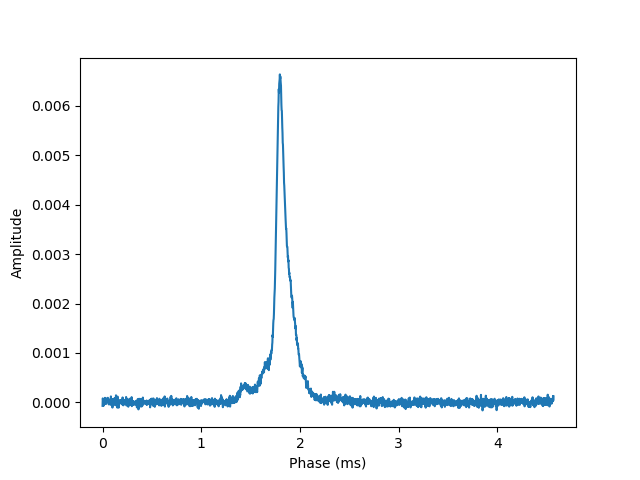

In [8]:
plt.plot(bins, data[64])
plt.xlabel('Phase (ms)')
plt.ylabel('Amplitude')
plt.show()

Use `plot_pulseAmplitudes(data, bins, freqs)` to visualize any grid of intensity data as a function of frequency and phase. The bottom panel shows the collapsed time series when you sum over all frequencies. At the top, you can see the signal to noise ratio (S/N or SNR) and $\sigma_{\mathrm{TOA}}$, the TOA uncertainty (in ms), when you fit a Gaussian pulse.

<IPython.core.display.Javascript object>


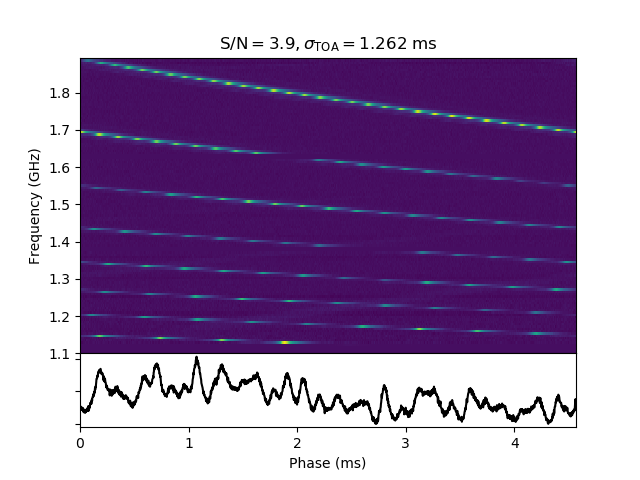

In [19]:
plot_pulseAmplitudes(data, bins, freqs)

## Calculating TOAs

The function `getChannelTOA(data, bins, freqChannel)` calculates the value of the time-of-arrival of a pulse in pulse phase. The return value is in milliseconds. Be careful of phase wraps!

In [32]:
getChannelTOA(data, bins, 3)

2.4871564041875565

In [33]:
toas = np.empty_like(freqs)

for i in range(data.shape[0]):
    try:
        toas[i] = getChannelTOA(data, bins, i)
    except IndexError:
        toas[i] = np.nan

<IPython.core.display.Javascript object>


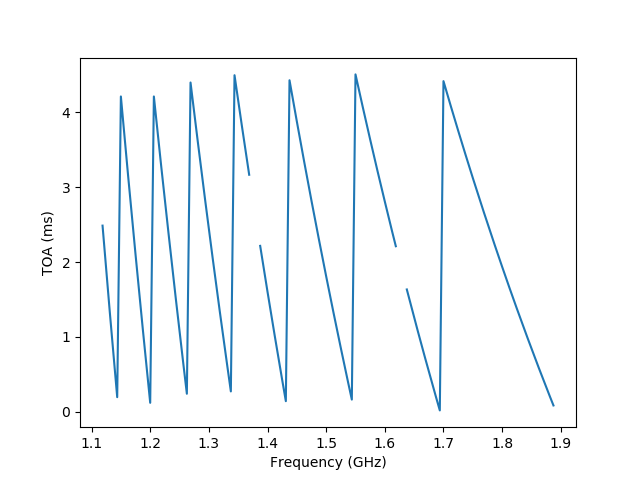

In [34]:
plt.plot(freqs, toas)
plt.xlabel('Frequency (GHz)')
plt.ylabel('TOA (ms)')
plt.show()

## Determining the DM

The function `getDM(timeDiff, freqLow, freqHigh)` determines the DM (in pc cm$^{-3}$, the usual DM units) given a time difference between two frequencies. `timeDiff` should be in milliseconds, `freqLow` and `freqHigh` in GHz. Use this to get a rough estimate of the overall DM.

In [42]:
DM = getDM(toas[120]-toas[100], freqs[100], freqs[120])
DM

15.98958825992196

## De-dispersing the data

The function `dedisperse(data, bins, freqs, trialDM)` performs channel-by-channel dedispersion with a given trial dispersion measure, `trialDM`. The output array, `dedispersedData`, will be the same shape as the original data array, so it can also be plotted with `plot_pulseAmplitudes()`.

In [43]:
dedispersedData = dedisperse(data, bins, freqs, DM)

<IPython.core.display.Javascript object>


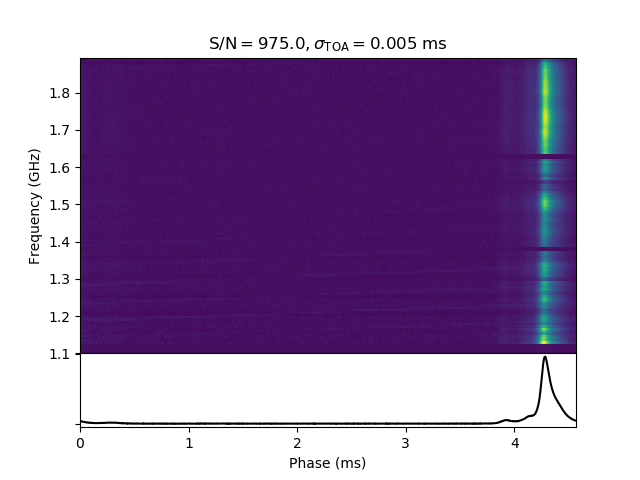

In [44]:
plot_pulseAmplitudes(dedispersedData, bins, freqs)

You may find the `significance()` function useful when trying to hone in on the best DM for your data set. Dedisperse the data according to some trial DM and feed the dedispersed values into this function. It will return a signal-to-noise ratio --- the bigger the number, the more closely the pulses in different frequency bands overlap with each other. If you change the trial DM with which you dedisperse the data and this number gets bigger, you're moving the trial DM in the right direction.

In [45]:
significance(dedispersedData)

974.99314825047

## Searching over DM

If you feel like you've constrained the DM of the pulsar pretty well, you can use function `DMSearch(data, bins, freqs, DMLB, DMUB, nDM)` to really zero in on it. Given a lower bound on the DM (`DMLB`) and an upper bound (`DMUB`), this function will assess the significance of folding the data according to `nDM` different DMs, equally spaced between the lower bound and the upper bound.

In [46]:
trialDMs, sns = DMSearch(data, bins, freqs, 15, 17, 128)

0.78125% complete
1.5625% complete
2.34375% complete
3.125% complete
3.90625% complete
4.6875% complete
5.46875% complete
6.25% complete
7.03125% complete
7.8125% complete
8.59375% complete
9.375% complete
10.15625% complete
10.9375% complete
11.71875% complete
12.5% complete
13.28125% complete
14.0625% complete
14.84375% complete
15.625% complete
16.40625% complete
17.1875% complete
17.96875% complete
18.75% complete
19.53125% complete
20.3125% complete
21.09375% complete
21.875% complete
22.65625% complete
23.4375% complete
24.21875% complete
25.0% complete
25.78125% complete
26.5625% complete
27.34375% complete
28.125% complete
28.90625% complete
29.6875% complete
30.46875% complete
31.25% complete
32.03125% complete
32.8125% complete
33.59375% complete
34.375% complete
35.15625% complete
35.9375% complete
36.71875% complete
37.5% complete
38.28125% complete
39.0625% complete
39.84375% complete
40.625% complete
41.40625% complete
42.1875% complete
42.96875% complete
43.75% complete


You can visualize the results of a DM search with the function `plot_X2s(trialDMs, sns)`, which plots the output of `DMSearch()`. Look for a peak in the S/N values as an indicator of the best DM at which to dedisperse the data.

<IPython.core.display.Javascript object>


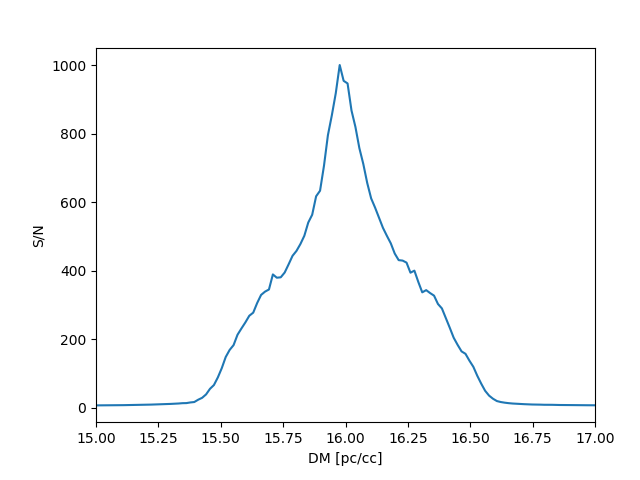

In [47]:
plot_X2s(trialDMs, sns)